In [34]:
import torch
import cv2
import numpy as np
from IoU import intersection_over_union
import matplotlib.pyplot as plt

In [30]:
def non_max_suppression(bboxes, iou_thershold, prob_thershold, bbox_format='corner'):
    D = []
    bboxes = [a_bbox.numpy() for a_bbox in bboxes if a_bbox[0] > prob_thershold]
    bboxes = torch.from_numpy(np.array(sorted(bboxes, key=lambda x : x[0], reverse=True)))
    r = 1
    while bboxes.shape[0] > 0:
        print('Round:', r)
        print('BBox size:', bboxes.shape)
        max_prob_bbox = bboxes[0]
        dummy_bboxes = bboxes[1:]
        bboxes = dummy_bboxes
        max_prob_bbox_arr = torch.mul(torch.ones((bboxes.shape[0], 1)), max_prob_bbox)
        nms_idx = intersection_over_union(max_prob_bbox_arr[..., 1:], bboxes[..., 1:], bbox_format=bbox_format) < iou_thershold
        bboxes = bboxes[nms_idx.squeeze()].squeeze(axis=1)
        print('BBox:', bboxes)
        r += 1
        D.append(max_prob_bbox)
        print('-------------------------------')
    return D

In [31]:
bboxes = torch.Tensor([[0.9, 1, 1, 5, 6], [0.8, 2, 1, 3, 3], [0.4, 4, 4, 8, 6], [0.7, 3, 3, 6, 6]])
iou_thershold = 0.5
prob_thershold = 0.5

In [32]:
D = non_max_suppression(bboxes, iou_thershold, prob_thershold)
D

Round: 1
BBox size: torch.Size([3, 5])
BBox: tensor([[0.8000, 2.0000, 1.0000, 3.0000, 3.0000],
        [0.7000, 3.0000, 3.0000, 6.0000, 6.0000]])
-------------------------------
Round: 2
BBox size: torch.Size([2, 5])
BBox: tensor([[0.7000, 3.0000, 3.0000, 6.0000, 6.0000]])
-------------------------------
Round: 3
BBox size: torch.Size([1, 5])
BBox: tensor([], size=(0, 5))
-------------------------------


[tensor([0.9000, 1.0000, 1.0000, 5.0000, 6.0000]),
 tensor([0.8000, 2.0000, 1.0000, 3.0000, 3.0000]),
 tensor([0.7000, 3.0000, 3.0000, 6.0000, 6.0000])]

In [63]:
D[0].dtype = torch.int16

AttributeError: attribute 'dtype' of 'torch._C._TensorBase' objects is not writable

(1, 1) (5, 6)
(2, 1) (3, 3)
(3, 3) (6, 6)


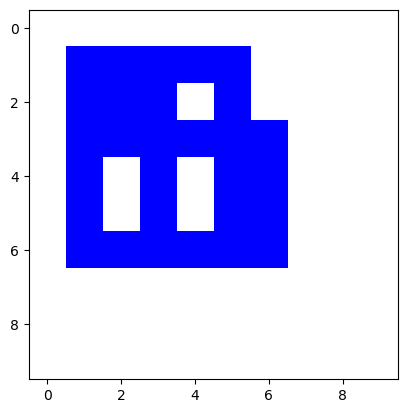

In [66]:
plain_img = (np.ones((10, 10, 3)) * 255).astype(np.uint8)

color = (0, 0, 255) # BGR format
thickness = 1
for a_bbox in D:
    a_bbox = a_bbox.to(torch.int16).numpy()
    start_point = (a_bbox[1], a_bbox[2])
    end_point = (a_bbox[3], a_bbox[4])
    print(start_point, end_point)
    plain_img = cv2.rectangle(plain_img, start_point, end_point, color, thickness)
plt.imshow(plain_img)

In [4]:
bboxes = [a_bbox.numpy() for a_bbox in bboxes if a_bbox[0] > prob_thershold]
bboxes = torch.from_numpy(np.array(sorted(bboxes, key=lambda x : x[0], reverse=True)))

In [5]:
bboxes

tensor([[0.9000, 1.0000, 1.0000, 5.0000, 6.0000],
        [0.8000, 2.0000, 1.0000, 3.0000, 3.0000],
        [0.7000, 3.0000, 3.0000, 6.0000, 6.0000]])

In [6]:
max_prob_bbox = bboxes[0]
dummy_bboxes = bboxes[1:]
bboxes = dummy_bboxes
# print(np.ones((bboxes.shape[0], 1)) @ max_prob_bbox[np.newaxis, 1:])
max_prob_bbox_arr = torch.mul(torch.ones((bboxes.shape[0], 1)), max_prob_bbox)

In [7]:
max_prob_bbox_arr

tensor([[0.9000, 1.0000, 1.0000, 5.0000, 6.0000],
        [0.9000, 1.0000, 1.0000, 5.0000, 6.0000]])

In [8]:
bboxes

tensor([[0.8000, 2.0000, 1.0000, 3.0000, 3.0000],
        [0.7000, 3.0000, 3.0000, 6.0000, 6.0000]])

In [16]:
result = intersection_over_union(max_prob_bbox_arr[..., 1:], bboxes[..., 1:], bbox_format='corner') < iou_thershold
result

tensor([[True],
        [True]])

In [17]:
bboxes[result.squeeze()]

tensor([[0.8000, 2.0000, 1.0000, 3.0000, 3.0000],
        [0.7000, 3.0000, 3.0000, 6.0000, 6.0000]])